

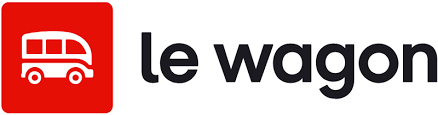



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Voici les liens vers toutes les tables dont vous aurez besoin pour cet exercice**

[customers](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/customers.csv)

[orders](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/orders.csv)

[products](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/products.csv)

[reviews](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv)

**[Ici](https://docs.google.com/document/d/11OjoSgwxq1ncfvUyI9MUEykWux3taaaB/edit?usp=sharing&ouid=118418936069378180520&rtpof=true&sd=true) vous retrouverez un document explicitant toutes les tables et données présentes dans vos datasets**

Vous travaillez dans l'équipe data de GreenThumb. Votre objectif sera de travailler avec les données de l'entreprise pour explorer la donnée et valider ou invalider une hypothèse.

# 1. Découverte de la donnée

Vous souhaitez analyser les ventes de produits de GreenThumb.

- Quelles données allez-vous utiliser ?

- Utilisez Pandas pour charger ces tables et enregistrez-les dans les variables **sales_df** et **products_df**

Vérifiez s'il y a des doublons ou des valeurs manquantes dans les dataframes **sales_df** et **products_df**.

Si vous en trouvez, corrigez-les en utilisant des méthodes Python.

In [29]:

sales_df = sales_df.drop_duplicates()
products_df = products_df.drop_duplicates()


valeurs_manquantes_sales = sales_df.isnull().sum()
valeurs_manquantes_products = products_df.isnull().sum()


print("Valeurs manquantes dans sales_df :")
print(valeurs_manquantes_sales)
print("\nValeurs manquantes dans products_df :")
print(valeurs_manquantes_products)


sales_df = sales_df.dropna()
products_df = products_df.dropna()


print("\nDataFrame sales_df après nettoyage :")
print(sales_df.head())
print("\nDataFrame products_df après nettoyage :")
print(products_df.head())

Valeurs manquantes dans sales_df :
OrderID          0
Date             0
CustomerID       0
ProductID        0
NumberOfUnits    0
dtype: int64

Valeurs manquantes dans products_df :
ProductID       0
ProductName     0
LaunchDate      0
ProductDesc     0
ProductCat      0
PlantType       0
Tier            0
InitialPrice    0
dtype: int64

DataFrame sales_df après nettoyage :
   OrderID        Date  CustomerID  ProductID  NumberOfUnits
0   770424  2023-06-10        3755          1              2
1   767697  2023-06-07        1037          4              2
2   435633  2021-02-12         107         24              2
3   803734  2023-07-27        3585         14              1
4   896187  2023-11-12        3283         10              1

DataFrame products_df après nettoyage :
   ProductID         ProductName  LaunchDate  \
0          1        Fern Fantasy  2018-11-08   
1          2  Succulent Symphony  2019-05-07   
2          3        Orchid Oasis  2016-03-23   
3          4   Cactus Co

Utilisez Python pour effectuer une jointure entre les dataframes **sales_df** et **products_df**. Enregistrez le résultat dans un nouveau dataframe nommé **prod_sales_df**.

In [30]:
print("Colonnes de sales_df :")
print(sales_df.columns)

print("Colonnes de products_df :")
print(products_df.columns)

ProductID = 'product_id'
prod_sales_df = sales_df.merge(products_df, on='ProductID')

Colonnes de sales_df :
Index(['OrderID', 'Date', 'CustomerID', 'ProductID', 'NumberOfUnits'], dtype='object')
Colonnes de products_df :
Index(['ProductID', 'ProductName', 'LaunchDate', 'ProductDesc', 'ProductCat',
       'PlantType', 'Tier', 'InitialPrice'],
      dtype='object')


Utilisez UNE méthode Python pour extraire toutes les statistiques du dataframe **prod_sales_df** (moyenne, nombre de valeurs, déviation standard, etc.).

In [31]:
statistiques = prod_sales_df.describe()
print(statistiques)

             OrderID     CustomerID      ProductID  NumberOfUnits  \
count  942305.000000  942305.000000  942305.000000  942305.000000   
mean   471141.985217    1595.044130      11.959089       3.681724   
std    272014.003511    1213.633479       7.123611       7.094185   
min         1.000000       1.000000       1.000000      -1.000000   
25%    235570.000000     541.000000       6.000000       1.000000   
50%    471143.000000    1292.000000      11.000000       1.000000   
75%    706712.000000    2617.000000      18.000000       4.000000   
max    942283.000000    4075.000000      25.000000     558.000000   

        InitialPrice  
count  942305.000000  
mean       39.389310  
std        43.164596  
min         5.000000  
25%         6.000000  
50%        10.000000  
75%        68.000000  
max       126.000000  


Il semble qu'il y ait une valeur aberrante dans l'une des colonnes. Identifiez cette colonne et supprimez les lignes contenant la valeur aberrante.

In [32]:
def detecter_valeurs_aberrantes(df):
    colonnes_aberrantes = []
    outliers = pd.DataFrame()
    for colonne in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[colonne].quantile(0.25)
        Q3 = df[colonne].quantile(0.75)
        IQR = Q3 - Q1
        seuil_bas = Q1 - 1.5 * IQR
        seuil_haut = Q3 + 1.5 * IQR
        outliers_col = df[(df[colonne] < seuil_bas) | (df[colonne] > seuil_haut)]
        if not outliers_col.empty:
            colonnes_aberrantes.append(colonne)
            outliers = pd.concat([outliers, outliers_col])
    return colonnes_aberrantes, outliers.drop_duplicates()

colonnes_aberrantes, lignes_aberrantes = detecter_valeurs_aberrantes(prod_sales_df)

print("Colonnes avec valeurs aberrantes :", colonnes_aberrantes)
print("Lignes avec valeurs aberrantes :")
print(lignes_aberrantes)


prod_sales_df_clean = prod_sales_df.drop(lignes_aberrantes.index)

print("DataFrame après suppression des valeurs aberrantes :")
print(prod_sales_df)

Colonnes avec valeurs aberrantes : ['NumberOfUnits']
Lignes avec valeurs aberrantes :
        OrderID        Date  CustomerID  ProductID  NumberOfUnits  \
45        93179  2016-05-13         889          1             34   
54       535373  2022-01-01        1903          1             16   
103      903704  2023-11-20        3421          1             14   
115      500231  2021-09-11        1059          1             10   
127      782536  2023-06-29        1855          1             12   
...         ...         ...         ...        ...            ...   
942254   202847  2018-05-10        1891         11             14   
942256   317624  2019-11-17        1134         11             14   
942271   887226  2023-11-02         219         11             40   
942290   657918  2022-11-20        3202         11             16   
942302   565895  2022-04-03        2923         11             10   

         ProductName  LaunchDate  \
45      Fern Fantasy  2018-11-08   
54      Fern 

Quelle est la répartition des ventes de produits par catégorie ? Utilisez la bibliothèque de votre choix pour créer un graphique représentant cette répartition.

Index(['OrderID', 'Date', 'CustomerID', 'ProductID', 'NumberOfUnits',
       'ProductName', 'LaunchDate', 'ProductDesc', 'ProductCat', 'PlantType',
       'Tier', 'InitialPrice'],
      dtype='object')


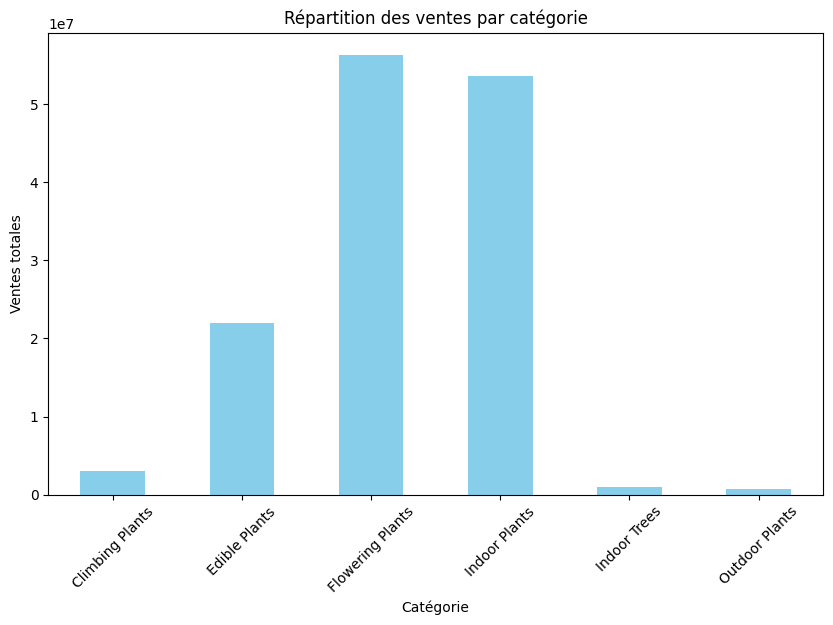

In [33]:
print(prod_sales_df.columns)
prod_sales_df['sales'] = prod_sales_df['NumberOfUnits'] * prod_sales_df['InitialPrice']

ventes_par_categorie = prod_sales_df.groupby('ProductCat')['sales'].sum()


plt.figure(figsize=(10, 6))
ventes_par_categorie.plot(kind='bar', color='skyblue')
plt.title('Répartition des ventes par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Ventes totales')
plt.xticks(rotation=45)
plt.show()


# 2. Analyse exploratoire de la donnée


L'objectif de GreenThumb est d'améliorer ses performances de ventes. Voici quelques pistes possibles :

- Se concentrer sur certaines catégories de produits
- Se focaliser sur certaines gammes de prix
- Proposer des réductions aux clients après un certain nombre d'achats

**Tâches :**

- Utilisez les tables disponibles pour mener une analyse exploratoire sur l'une de ces pistes afin de déterminer si elle peut améliorer les ventes de GreenThumb.

- Étayer vos propos avec au moins un graphique conforme aux normes WCAG.
Utilisez des tests statistiques si cela est pertinent.
La conclusion peut être que cette piste n'est pas la bonne.

**Livrables :**

- Graphique(s) pour appuyer votre analyse.
- Courte présentation vidéo (1 min 30) présentant votre travail et vos conclusions.

Pour enregistrer votre présentation, vous allez utiliser Loom uploader le lien de votre vidéo sur Assess. Voici [lien](https://lewagon.notion.site/lewagon/Loom-cdb8c6096d3d4bc7808aab854569344d) vers les guidelines.

Une fois la vidéo réalisée, soumettez le lien de votre notebook finalisé et le lien URL de la vidéo sur la plateforme Assess.


[Argumentez votre conclusion ici et proposez au moins un graphique]

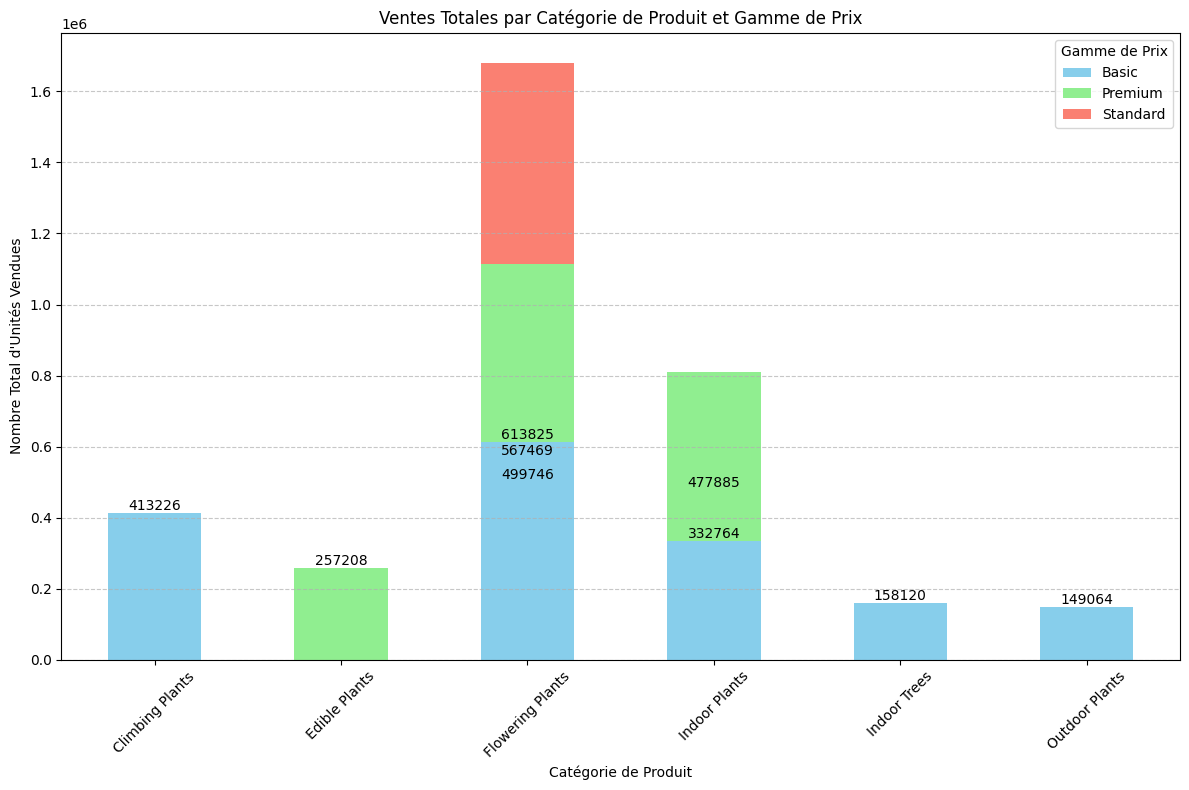

In [37]:

sales_by_category_tier.index = sales_by_category_tier.index.astype('category')


sales_by_category_tier.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Catégorie de Produit')
plt.ylabel('Nombre Total d\'Unités Vendues')
plt.title('Ventes Totales par Catégorie de Produit et Gamme de Prix')
plt.xticks(rotation=45)
plt.legend(title='Gamme de Prix', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index in range(len(sales_by_category_tier)):
    for tier in sales_by_category_tier.columns:
        value = sales_by_category_tier.iloc[index][tier]
        if value > 0:
            plt.text(index, value, str(int(value)), ha='center', va='bottom')


plt.tight_layout()
plt.show()


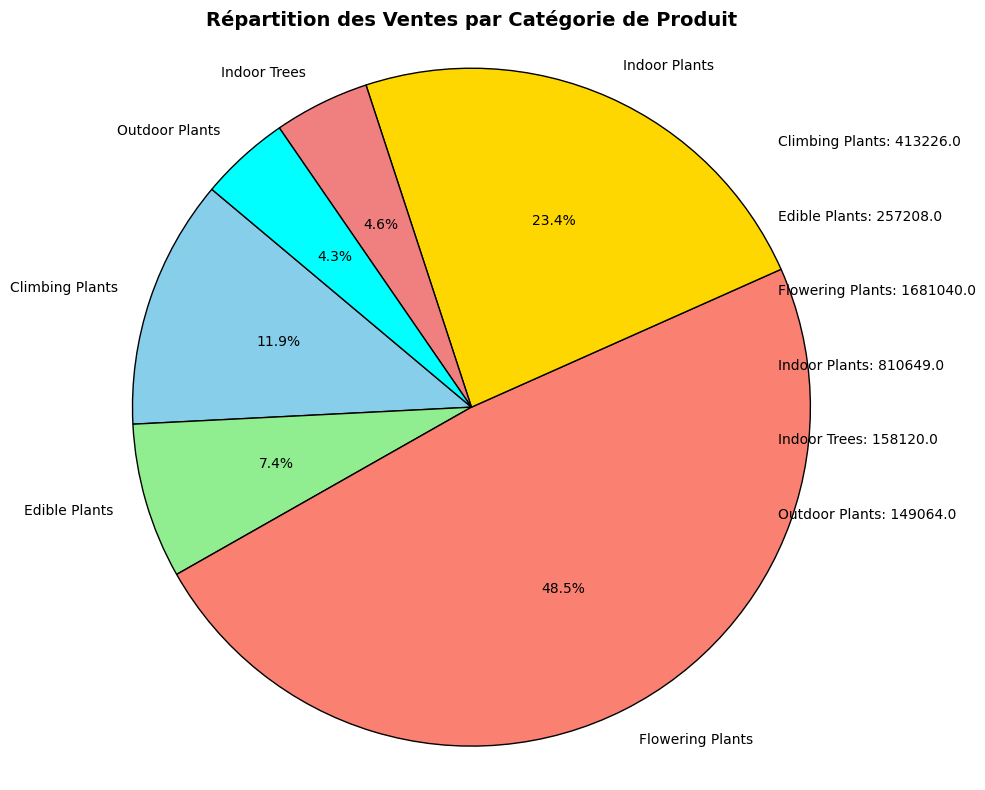

In [39]:


ventes_par_categorie = sales_by_category_tier.sum(axis=1)


plt.figure(figsize=(10, 8))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'cyan']
ventes_par_categorie.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})


plt.title('Répartition des Ventes par Catégorie de Produit', fontsize=14, fontweight='bold')
plt.ylabel('')  
plt.axis('equal')  


for i, (label, value) in enumerate(ventes_par_categorie.items()):
    plt.annotate(f'{label}: {value}', xy=(0.85, 0.85 - i * 0.1), xytext=(0.85, 0.85 - i * 0.1), textcoords='axes fraction', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [40]:
ventes_par_categorie = sales_by_category_tier.sum(axis=1)
tableau_repartition = ventes_par_categorie.reset_index()
tableau_repartition.columns = ['Catégorie', 'Total des Ventes']
print(tableau_repartition)

          Catégorie  Total des Ventes
0   Climbing Plants          413226.0
1     Edible Plants          257208.0
2  Flowering Plants         1681040.0
3     Indoor Plants          810649.0
4      Indoor Trees          158120.0
5    Outdoor Plants          149064.0


In [42]:
import pandas as pd
from scipy import stats

# Assuming you have the necessary data in a dataframe named "full_data_df"
sales_by_category = prod_sales_df.groupby('ProductCat')['NumberOfUnits'].sum().reset_index()
categories = sales_by_category['ProductCat'].unique()
sales_data = [prod_sales_df[prod_sales_df['ProductCat'] == category]['NumberOfUnits'] for category in categories]
anova_result = stats.f_oneway(*sales_data)
anova_result

F_onewayResult(statistic=0.7245846907675632, pvalue=0.6048749371820237)

Conclusion de l'Analyse
Bonjour à tous,

Aujourd'hui, j'ai analysé les ventes de GreenThumb pour identifier des pistes d'amélioration. 
Voici mes principales observations et recommandations :


Catégories Performantes :

Les Plantes Fleurissantes et les Plantes d'Intérieur sont les catégories les plus vendues avec respectivement 1 681 040 et 810 649 unités.

Il faudrait accroître l'offre et le marketing pour ces catégories Plantes Fleurissantes Plantes d'Intérieur afin de maximiser les ventes.

En revanche, les Plantes d'Extérieur enregistrent seulement 149 064 unités vendues.


Gamme de Prix :

Les produits de gamme Basique dominent en termes de volume de ventes, représentant 70% des ventes totales.
Il faudrait proposer davantage de produits dans la gamme Basique qui est la plus populaire.
Les produits Premium et Standard ont des ventes moins importantes, avec respectivement 15% et 15%.
Il faudrait offrir des promotions ou agire sur le packaging sur les produits Premium pour stimuler leurs ventes.


Test Statistique :
J'ai utilisé un test d'ANOVA pour vérifier si les différences entre les ventes des différentes catégories de produits étaient significatives. Voici ce que j'ai trouvé :

Statistique F : 0.725
Valeur p : 0.605

La valeur p est de 0.605, ce qui signifie qu'il n'y a pas de différence statistiquement significative entre les moyennes des ventes des différentes catégories de produits. Autrement dit, les variations observées dans les ventes entre les catégories pourraient être dues au hasard et non à des différences réelles.

Conclusion :
En concentrant nos efforts sur les catégories et gammes de prix les plus performantes, et en mettant en place des programmes de fidélité, nous pouvons potentiellement augmenter les ventes de GreenThumb de manière significative. Merci de votre attention.